In [58]:
#!pip install -r requirements.txt
#uncomment and run only if running for the first time

In [59]:
# Loading essential libraries
import numpy as np
import pandas as pd

In [60]:
# Loading the dataset
df = pd.read_csv('Dataset/kaggle_fake_train.csv')

In [61]:
df.shape

(20800, 5)

In [62]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [63]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [64]:
# Dropping the 'id' column
df.drop('id', axis=1, inplace=True)

In [65]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

In [66]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vyomr\AppData\Local\Temp\ipykernel_17764\1589265639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


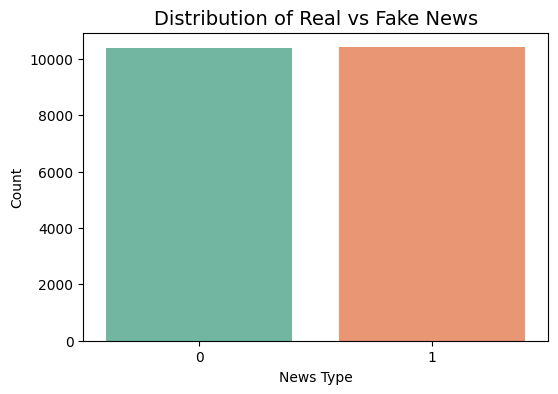

In [67]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Real vs Fake News', fontsize=14)
plt.xlabel('News Type')
plt.ylabel('Count')
plt.show()

In [68]:
df.shape

(20800, 4)

In [69]:
# Finding any NaN values
df.isna().any()

title      True
author     True
text       True
label     False
dtype: bool

In [70]:
# Dropping NaN values
df.dropna(inplace=True)
print(df.shape)

(18285, 4)


In [71]:
news = df.copy()

In [72]:
news.reset_index(inplace=True)

In [73]:
# Importing essential libraries for performing Natural Language Processing on 'kaggle_fake_train' dataset
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [74]:
# Cleaning the news
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [75]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [76]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [77]:
X.shape

(18285, 5000)

In [78]:
X[0:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(10, 5000))

In [79]:
# Extracting dependent variable from the dataset
y = news['label']

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [81]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [82]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [83]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 90.16%
Precision score is: 0.87
Recall score is: 0.91


In [84]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [85]:
nb_cm

array([[1825,  215],
       [ 145, 1472]])

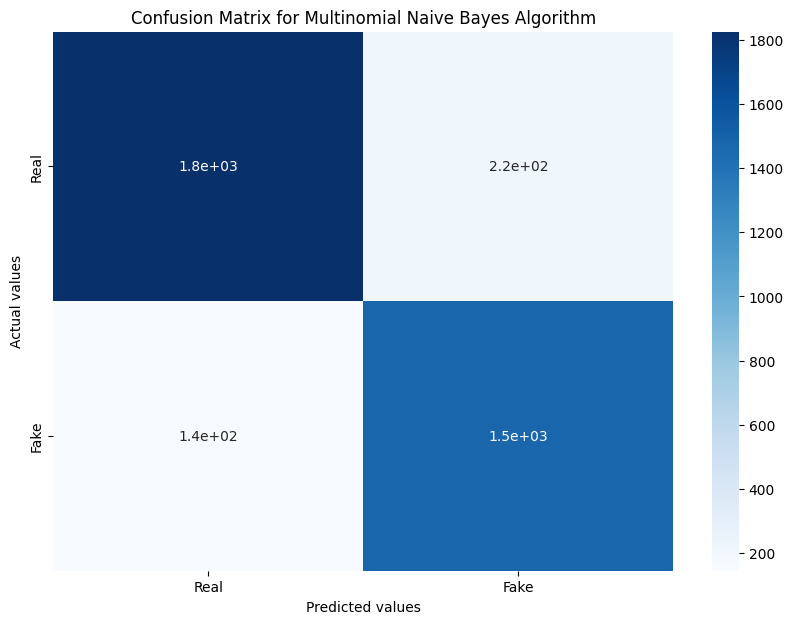

In [86]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

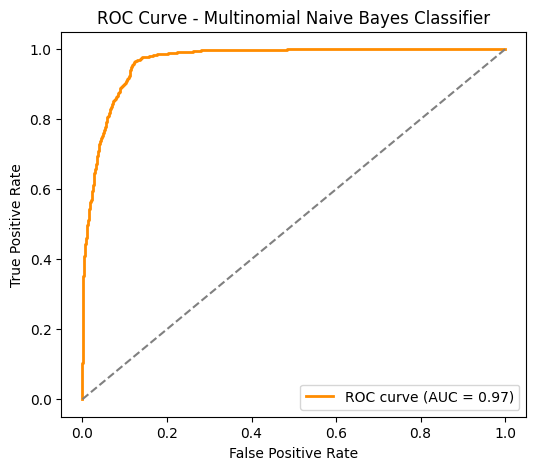

In [87]:
from sklearn.metrics import roc_curve, auc

y_prob = nb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multinomial Naive Bayes Classifier')
plt.legend(loc='lower right')
plt.show()


In [88]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  accuracy_mnb = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(accuracy_mnb*100,2)))
  if accuracy_mnb>best_accuracy:
    best_accuracy = accuracy_mnb
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 90.4%
Accuracy score for alpha=0.2 is: 90.43%
Accuracy score for alpha=0.3 is: 90.43%
Accuracy score for alpha=0.4 is: 90.32%
Accuracy score for alpha=0.5 is: 90.29%
Accuracy score for alpha=0.6 is: 90.18%
Accuracy score for alpha=0.7 is: 90.18%
Accuracy score for alpha=0.8 is: 90.18%
Accuracy score for alpha=0.9 is: 90.16%
Accuracy score for alpha=1.0 is: 90.16%
--------------------------------------------
The best accuracy is 90.43% with alpha value as 0.2


In [89]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
# Predicting the Test set results
lr_y_pred = lr_classifier.predict(X_test)

In [91]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 93.57%
Precision score is: 0.89
Recall score is: 0.97


In [92]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

In [93]:
lr_cm

array([[1855,  185],
       [  50, 1567]])

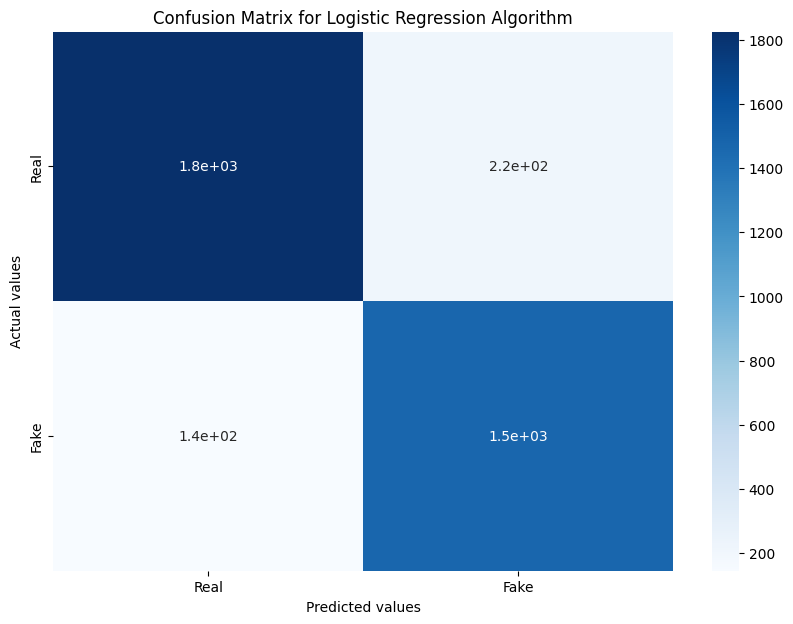

In [94]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

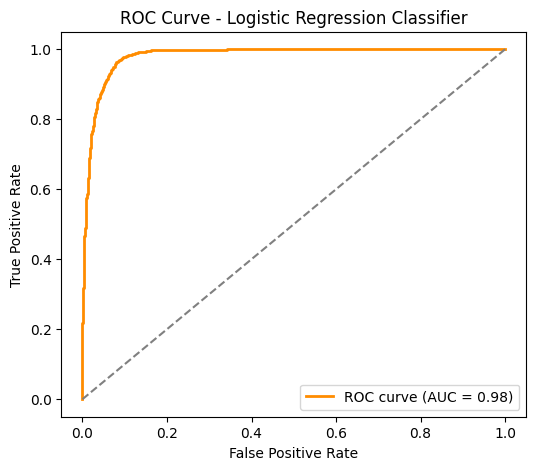

In [95]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities from the trained Logistic Regression model
y_prob = lr_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Classifier')
plt.legend(loc='lower right')
plt.show()


In [96]:
# Hyperparameter tuning the Logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  accuracy_lr = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(accuracy_lr*100,2)))
  if accuracy_lr>best_accuracy:
    best_accuracy = accuracy_lr
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=0.1 is: 92.02%
Accuracy score for C=0.2 is: 92.92%
Accuracy score for C=0.3 is: 93.22%
Accuracy score for C=0.4 is: 93.55%
Accuracy score for C=0.5 is: 93.63%
Accuracy score for C=0.6 is: 93.63%
Accuracy score for C=0.7 is: 93.57%
Accuracy score for C=0.8 is: 93.57%
Accuracy score for C=0.9 is: 93.57%
Accuracy score for C=1.0 is: 93.57%
--------------------------------------------
The best accuracy is 93.63% with C value as 0.5


In [97]:
classifier = LogisticRegression(C=0.5, random_state=0)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.5
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


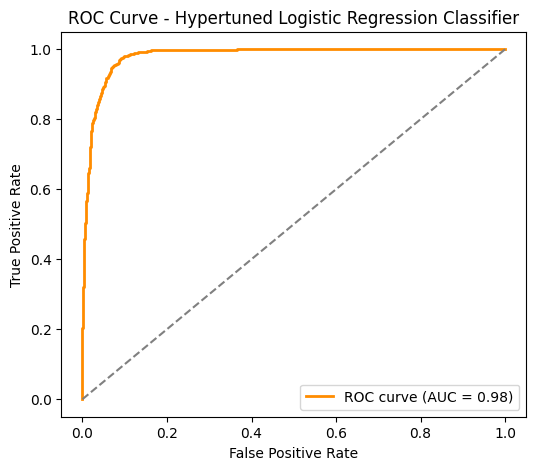

In [98]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities from the hypertuned logistic regression model
y_prob = classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Hypertuned Logistic Regression Classifier')
plt.legend(loc='lower right')
plt.show()


In [99]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)

In [100]:
# Importing test dataset
df_test = pd.read_csv('Dataset/kaggle_fake_test.csv')

In [101]:
df_test.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [102]:
news_title = df_test['title']

In [103]:
news_title.shape

(5200,)

In [104]:
# For generating random integer
from random import randint

In [105]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Why the Trump Team’s Economic Promises Will Be Hard to Execute - The New York Times
Prediction: This is a REAL news.


In [106]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Trump starts new YouTube channel to combat fake news
Prediction: This is a FAKE news!


In [107]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Chase Had Ads on 400,000 Sites. Then on Just 5,000. Same Results. - The New York Times
Prediction: This is a REAL news.


In [108]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: ‘What’s Our Best Path To 270?’ Gary Johnson Asks Campaign Aides Packing Up Office - The Onion - America's Finest News Source
Prediction: This is a FAKE news!


In [109]:
df.columns

Index(['title', 'author', 'text', 'label'], dtype='object')

C:\Users\vyomr\AppData\Local\Temp\ipykernel_17764\4107245189.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fake_df, x='Count', y='Word', ax=axes[0], palette='Reds_r')
C:\Users\vyomr\AppData\Local\Temp\ipykernel_17764\4107245189.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=real_df, x='Count', y='Word', ax=axes[1], palette='Greens_r')


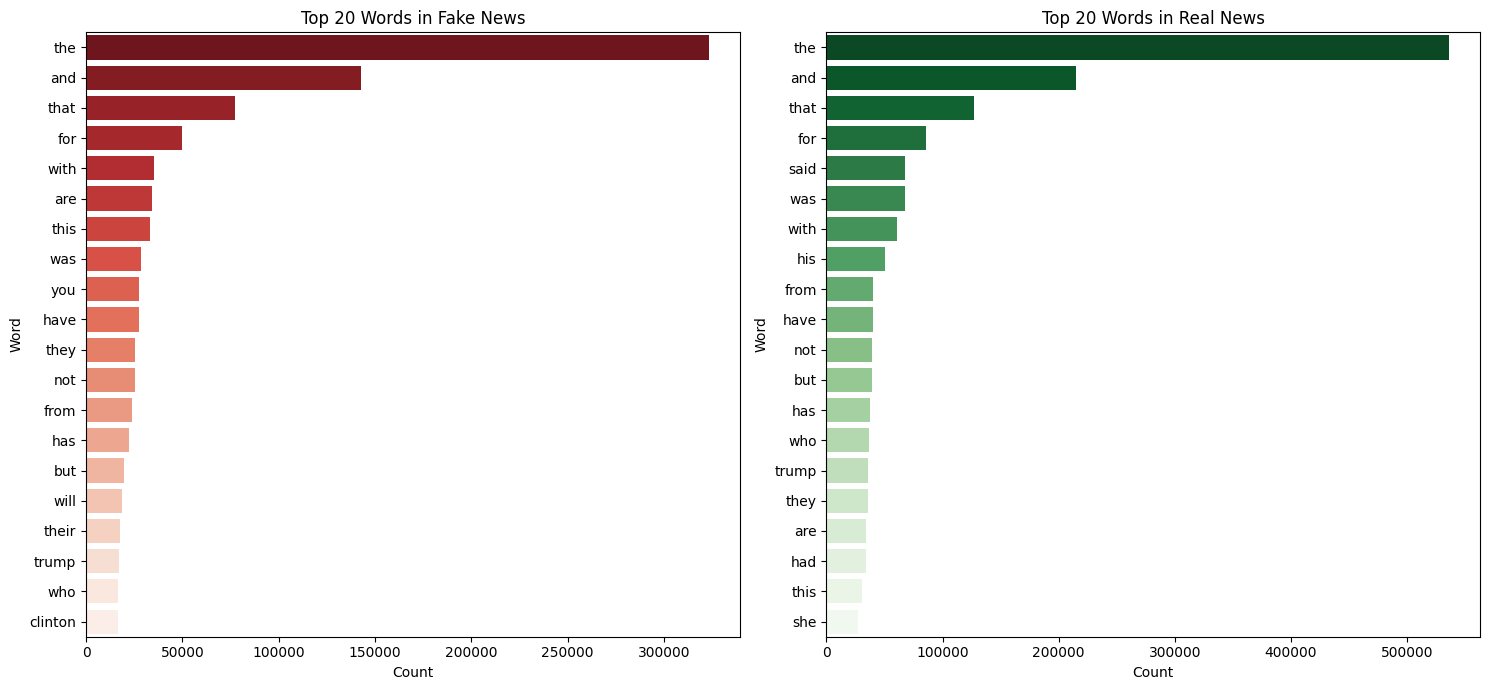

In [110]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd

# Make sure your column names are correct
# Example: 'label' → column with 0 for real, 1 for fake
#           'text' → column with article text
# Adjust if yours differ

# Separate fake and real news
fake_texts = " ".join(df[df['label'] == 1]['text'].astype(str).values)
real_texts = " ".join(df[df['label'] == 0]['text'].astype(str).values)

# Clean and tokenize
def clean_and_tokenize(text):
    words = re.findall(r'\b[a-zA-Z]{3,}\b', text.lower())
    return words

fake_words = clean_and_tokenize(fake_texts)
real_words = clean_and_tokenize(real_texts)

# Count most common words
fake_common = Counter(fake_words).most_common(20)
real_common = Counter(real_words).most_common(20)

# Convert to DataFrames for plotting
fake_df = pd.DataFrame(fake_common, columns=['Word', 'Count'])
real_df = pd.DataFrame(real_common, columns=['Word', 'Count'])

# Plot both side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.barplot(data=fake_df, x='Count', y='Word', ax=axes[0], palette='Reds_r')
axes[0].set_title('Top 20 Words in Fake News')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')

sns.barplot(data=real_df, x='Count', y='Word', ax=axes[1], palette='Greens_r')
axes[1].set_title('Top 20 Words in Real News')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

plt.tight_layout()
plt.show()


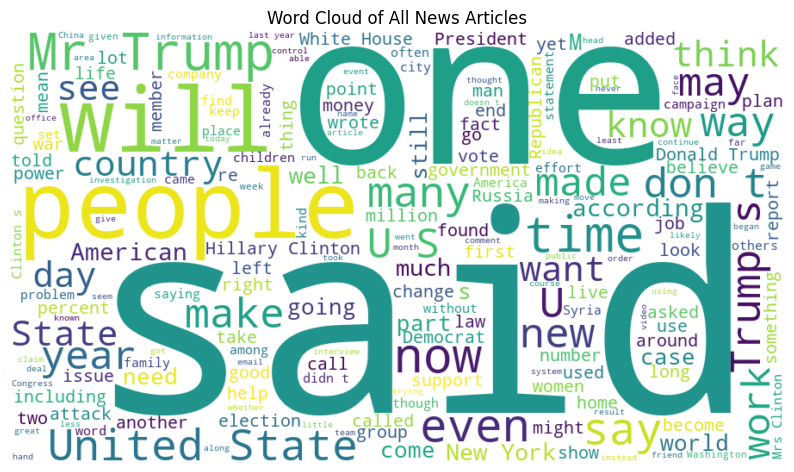

In [111]:
from wordcloud import WordCloud

text = " ".join(df['text'])
wc = WordCloud(width=900, height=500, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All News Articles')
plt.show()


C:\Users\vyomr\AppData\Local\Temp\ipykernel_17764\2962869222.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


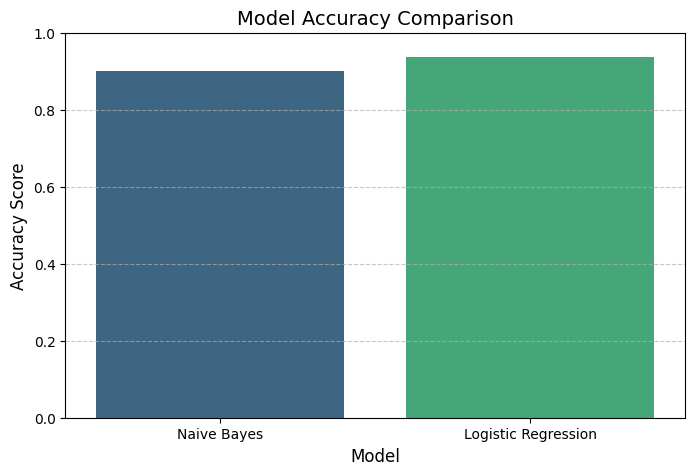

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_scores = {
    'Naive Bayes': accuracy_mnb,
    'Logistic Regression': accuracy_lr,
    #'Passive Aggressive': pac_accuracy
}

# Convert to lists for plotting
models = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.ylim(0, 1)  # since accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
